### Name: An Huynh
### Course: AIT626 - 003
### Date: January 22, 2025

### Task 0: Import necessary library

In [49]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer, wordpunct_tokenize
import string
from nltk.corpus import stopwords 
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/AnhHuynh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Task 1

#### 1.1

In [1]:
with open('Harry Potter Book 1.txt', 'r') as f:
    content = f.read()
print(content)

Harry Potter and the Sorcerer's Stone 

CHAPTER ONE 

THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. 

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. 

The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters

#### 1.2

In [11]:
sentences = sent_tokenize(content)
print("Number of sentects: {}".format(len(sentences)))

words = word_tokenize(content)
print("Number of words by word_tokenize: {}".format(len(words)))
print(words[0:20])

# Split text into words and punctuations
words_2 = wordpunct_tokenize(content)
print("Number of words by wordpunct_tokenize: {}".format(len(words_2)))
print(words_2[0:20])

# Use a tokenizer designed for social media text
words_3 = TweetTokenizer().tokenize(content)
print("Number of words by TweetTokenizer: {}".format(len(words_3)))
print(words_3[0:20])

Number of sentects: 6394
Number of words by word_tokenize: 98781
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']
Number of words by wordpunct_tokenize: 100020
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'", 's', 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', '.', 'and', 'Mrs', '.', 'Dursley']
Number of words by TweetTokenizer: 97123
['Harry', 'Potter', 'and', 'the', "Sorcerer's", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', '.', 'and', 'Mrs', '.', 'Dursley', ',', 'of']


#### 1.3

In [20]:
tokenizer = TweetTokenizer()
tokens = tokenizer.tokenize(content)

clean_words = []
for token in tokens:
    parts = token.split("'")
    for part in parts:
        if part and part not in string.punctuation:
            clean_words.append(part)

print("Number of words without punctuation: {}".format(len(clean_words)))
print(clean_words[:20])

Number of words without punctuation: 80613
['Harry', 'Potter', 'and', 'the', 'Sorcerer', 's', 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', 'and', 'Mrs', 'Dursley', 'of', 'number', 'four']


#### 1.4

In [44]:
stop_words = set(stopwords.words('english'))

clean_words = []
for token in tokens:
    parts = token.split("'")
    for part in parts:
        if (
            part 
            and part not in string.punctuation
            and part not in stop_words
            and part.isalpha()
        ):
                clean_words.append(part)
    
freq_dist = FreqDist(clean_words)
print("FreqDist with {} samples and {} outcomes".format(len(freq_dist),len(clean_words)))

FreqDist with 6414 samples and 44723 outcomes


#### 1.5

In [45]:
lemmetizer = WordNetLemmatizer()

lemmetized_words = [lemmetizer.lemmatize(word) for word in clean_words]

freq_dist_lemma = FreqDist(lemmetized_words)

print("FreqDist with {} samples and {} outcomes".format(len(freq_dist_lemma),len(clean_words)))

FreqDist with 5935 samples and 44723 outcomes


* The difference between 1.5 result and 1.4 result lies in the functionality of WordNetLemmatizer. It normalizes noun form (e.g: 'dogs' will become 'dog'). 

* Token counts do not change, but vocabulary sizes decrease. 

#### 1.6

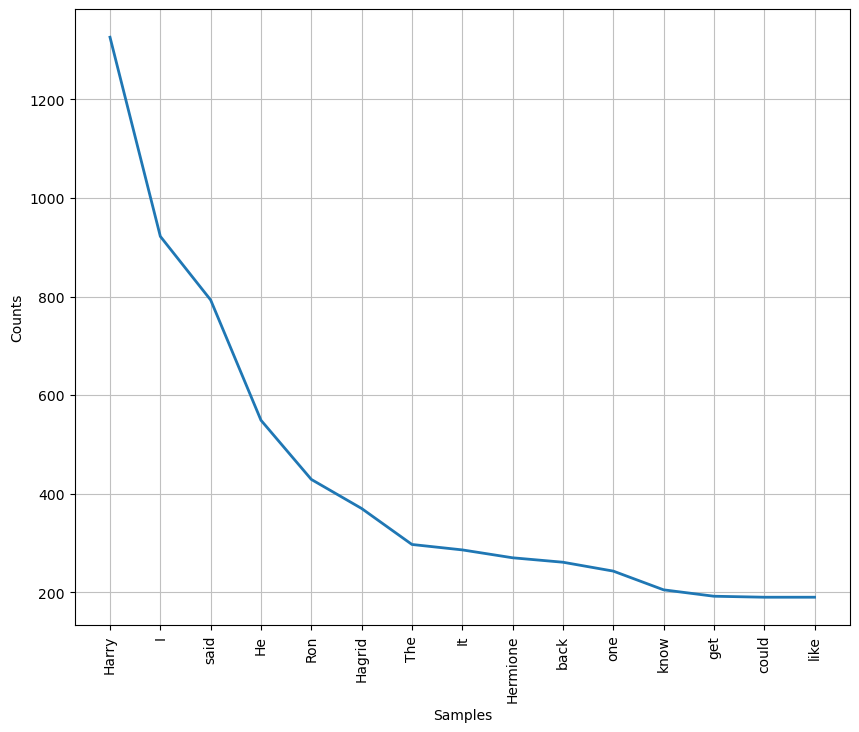

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
word_dist = FreqDist(lemmetized_words)

plt.figure(figsize=(10,8))
word_dist.plot(15)

### Task 2

#### 2.1

(-0.5, 399.5, 199.5, -0.5)

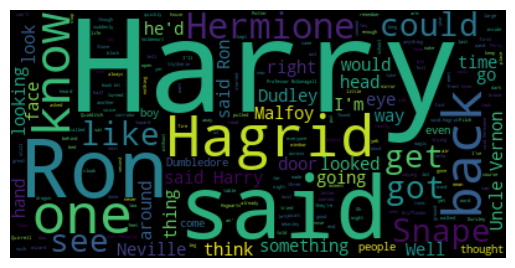

In [50]:
wordcloud = WordCloud(stopwords=stop_words).generate(content)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

#### 2.2

(-0.5, 399.5, 199.5, -0.5)

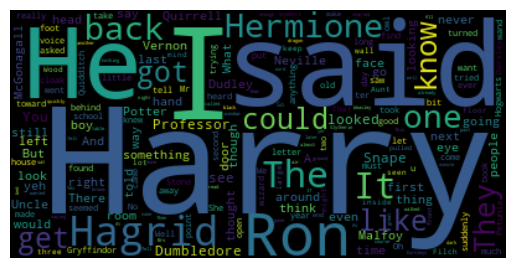

In [51]:
wordcloud = WordCloud().generate_from_frequencies(freq_dist_lemma)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

#### 2.3

* The differences between 2.1 and 2.2 are:
    * In 2.1, the code takes a single string of words in content, automatically split words by whitespace and/or punctuations internally. It then removed the words in stopwords, calculating word frequency internally before generating word cloud.

    * In 2.2, the code takes the dictionary of word frequencies calculated earlier (freq_dist_lemma) as is, no more splitting, stopwords removing, or refrency distribution counts needed. 
* This is 2 ways of approaching the same task. In the first way, WordCloud do all the work. In the second method, programmers proivde the calculated frequency and WordCloud just need to show it.

### Task 3

#### 3.1

* Text data and numeric data handling in data science and machine learning

* 1. Text represents unstructured data while numeric is structured data in nature.
* 2. Text data transforming complexity is high. It requires tokenizing, lemmetizing, stopwords filtering and typos. On the other hand, numeric data transformation complexity is low. Most of the time, the data is ready to use, or it requires only scaling or normalization step. 

* With text data, promgrammers need to use more advanced technique such as vectorizing to tranform text into numbers to feed in computer-readable format for machine learning and deep learning models.

#### 3.2

References: <br>
<i>[1] HyperionDev. Python NLP tutorial: Using NLTK for natural language processing
(https://blog.hyperiondev.com/post/nlp-tutorial-python-natural-language-processing/)</i><br>
<i>[2] Dr. Liao. Lab 1 Instructions and hints.</i><br>